[View in Colaboratory](https://colab.research.google.com/github/Sharwon/fastai-intro-kit/blob/master/python_intro_kit.ipynb)

# Jupyter Notebook - Tips

[Link tips and tricks](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)

In [0]:
#importing a library
import numpy as np

In [0]:
# press tab at the end of the code below, after uncommenting it.
# np. 
# sometime google colab dosent respond :P

In [0]:
# press double-tab in the fucntion argument space, after uncommenting it.
#np.ones()

In [0]:
# the detials will open in a custom window
??np.eye

In [10]:
# %time to get the execution time for a cell.
%time x = np.random.randn(3,2)

CPU times: user 127 µs, sys: 110 µs, total: 237 µs
Wall time: 247 µs


# Python Fundamentals

[Comprehensive Tutorial link](http://cs231n.github.io/python-numpy-tutorial/) 

In [11]:
#simple cell execution
3 + 5

8

In [34]:
numbers = [1,  2,  3,  4,  5]
type(numbers)

list

In [35]:
# loop
N = []
for n in numbers:
    if n%2 == 1:
        N.append(n**2)
        
print(N)

[1, 9, 25]


In [36]:
# functions
def odd_mul(num):
  temp = []
  for i in num:
    if i%2 == 1:
      temp.append(i**2)
  return temp

print(odd_mul(numbers))

[1, 9, 25]


### List, Dictionary Comprehensions

In [37]:
[], {}, () # list, dictionary, tuple. Python takes tuple as default input.

([], {}, ())


List comprehenssion minimizes the code below


```
for n in numbers:
    if n%2 == 1:
        n.append(n**2)
```




In [42]:
#conditional list comprehension
doubled_odds = [n ** 2 for n in numbers if n % 2 == 1]
doubled_odds

[1, 9, 25]

In [39]:
#dictionay comprehenssion
word = "fastAI"
dictionary = {i:w for i,w in enumerate(word)}
dictionary

{0: 'f', 1: 'a', 2: 's', 3: 't', 4: 'A', 5: 'I'}

### Lambda Functions

In [40]:
# f(x,y) = x + y
function_anony = lambda x, y : x + y
print(function_anony(1,2)) # first printed line.

3


In [41]:
# Filter out even numbers to lf1 
lf1 = filter(lambda x: x % 2 == 0, numbers)
print(list(lf1))

[2, 4]


## Matplotlib

In [0]:
#images within th notebook
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

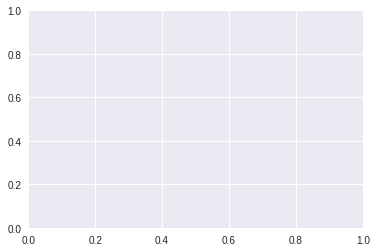

In [52]:
fig = plt.figure()  # a new figure window
ax = fig.add_subplot(1, 1, 1)  # specify (nrows, ncols, axnum)

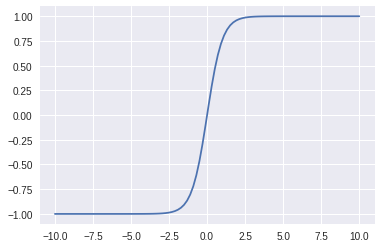

In [53]:
x = np.linspace(-10, 10, 100)
y = np.tanh(x)

ax.plot(x, y)
display(fig)

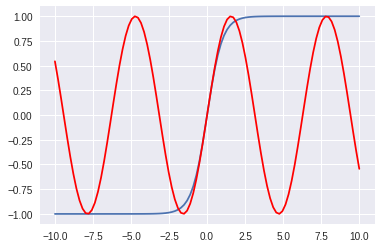

In [54]:
y2 = np.sin(x)
ax.plot(x, y2, 'r')

display(fig)

## Classes

Class objects support two kinds of operations: attribute references and instantiation.  
Attribute references use the standard syntax used for all attribute references in Python: `obj.name`  
Class instantiation uses function notation  

In [0]:
class SimpleNeuron():
  def __init__(self,data1, data2):
    self.weight = data1
    self.bias = data2
  # method is a function declared inside a class, here its get_data().
  def get_weight(self):
    print (self.weight)

In [77]:
s = SimpleNeuron(100, 2) # instantiation
print(s) # object location
s.weight # attribute reference

100

In [0]:
# CLASS METHOD
class SimpleNeuron():
  bias = 0.1 #default
  def __init__(self,w, b):
    self.weight = w
    self.bias = b
  # method is a function declared inside a class, here its get_data().
  def get_weight(self):
    print (self.weight)
    
  @classmethod
  def get_bias(cls):
    print(cls.bias)

In [80]:
SimpleNeuron.get_bias() # bound to class, not instance.

0.1


In [0]:
# STATIC METHOD
class SimpleNeuron():
  bias = 0.1 #default
  def __init__(self,w, b):
    self.weight = w
    self.bias = b
  # method is a function declared inside a class, here its get_data().
  def get_weight(self):
    print (self.weight)
    
  @classmethod
  def get_bias(cls):
    print(cls.bias)
    
  @staticmethod
  def linearproduct(x, w,  y):
    return (x*w + y)

In [89]:
SimpleNeuron.linearproduct(3, 4, 2) # result 3*4 + 2, this dosent depend on the class or object

14

In [87]:
# INHERITANCE - SUPER FN.

# main class
class SimpleNeuron():
  bias = 0.1 #default
  def __init__(self,w, b):
    self.weight = w
    self.bias = b
  # method is a function declared inside a class, here its get_data().
  def get_weight(self):
    print (self.weight)
    
  @classmethod
  def get_bias(cls):
    print(cls.bias)
    
  @staticmethod
  def linearproduct(x, w,  y):
    return (x*w + y)
  
# sub class, inherits form SimpleNeuron
class NeuronLayer(SimpleNeuron):
  pass

print(help(NeuronLayer))  # The inherited methods are shown

Help on class NeuronLayer in module __main__:

class NeuronLayer(SimpleNeuron)
 |  Method resolution order:
 |      NeuronLayer
 |      SimpleNeuron
 |      builtins.object
 |  
 |  Methods inherited from SimpleNeuron:
 |  
 |  __init__(self, w, b)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_weight(self)
 |      # method is a function declared inside a class, here its get_data().
 |  
 |  ----------------------------------------------------------------------
 |  Class methods inherited from SimpleNeuron:
 |  
 |  get_bias() from builtins.type
 |  
 |  ----------------------------------------------------------------------
 |  Static methods inherited from SimpleNeuron:
 |  
 |  linearproduct(x, w, y)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from SimpleNeuron:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak refere

In [96]:
# Why? .....to add extra features on top, like activation.

class NeuronLayer(SimpleNeuron):
  default_activ = 'relu'
  def __init__(self,w, b, acti): #notice that we dont initialize the w,b
    super(NeuronLayer, self).__init__(w, b)
    self.activation = acti
    
    
    
first_layer = NeuronLayer(10, 2, 'relu') 
second_layer = NeuronLayer(20, 2, 'sigmoid')
print(first_layer.weight) 
print(second_layer.activation)

10
sigmoid
